# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [86]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [87]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [88]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Paid for a 14 hour long fli...
1,✅ Trip Verified | Very inconsiderate PA annou...
2,"✅ Trip Verified | Absolutely terrible, lost m..."
3,✅ Trip Verified | We booked premium economy r...
4,✅ Trip Verified | We chose Rotterdam and Lond...


In [89]:
df.to_csv("D:/Forage/British Airways/data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [90]:
df['reviews'] = df['reviews'].str.replace('✅ Trip Verified |', ' ')
df['reviews'] = df['reviews'].str.replace('❎ Not Verified |', ' ')
df['reviews'] = df['reviews'].str.replace('Not Verified |', ' ')
df['reviews'] = df['reviews'].str.replace('\n', ' ')
df['reviews'] = df['reviews'].str.replace('\r', ' ')

print(df['reviews'])


0         Paid for a 14 hour long flight ticket which...
1         Very inconsiderate PA announcements were ma...
2         Absolutely terrible, lost my luggage on bot...
3         We booked premium economy round trip from P...
4         We chose Rotterdam and London City airport ...
                             ...                        
995       Bucharest to London. My flight with British...
996       London Heathrow to Bengaluru. I found the c...
997       Madrid to London. We paid for business clas...
998       Dublin to London Heathrow. British Airways ...
999       London to Seattle. My seat was on the upper...
Name: reviews, Length: 1000, dtype: object


In [91]:
print(df['reviews'].str.contains('❎').sum())
print(df['reviews'].str.contains('✅').sum())
print(df['reviews'].str.contains('Not Verified').sum())
print(df['reviews'].str.contains('Trip Verified').sum())
print(df['reviews'].str.contains('Verified').sum())
print(df['reviews'].str.contains('\n').sum())
print(df['reviews'].str.contains('\r').sum())

0
0
0
0
0
0
0


In [61]:
df.to_csv("D:/Forage/British Airways/data/cleandata.csv")

In [48]:
print(df.iloc[80])


reviews       The flight took off a little late due to He...
Name: 80, dtype: object


In [80]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords if not already done
nltk.download('stopwords')

# Get the list of stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from a text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the function to the DataFrame column containing the text data
df['reviews'] = df['reviews'].apply(remove_stopwords)

print(df['reviews'])


0      Paid 14 hour long flight ticket includes use i...
1      inconsiderate PA announcements made purser app...
2      Absolutely terrible, lost luggage flights, del...
3      booked premium economy round trip Phoenix Zuri...
4      chose Rotterdam London City airport convenienc...
                             ...                        
995    Bucharest London. flight British Airways 7 hou...
996    London Heathrow Bengaluru. found crew friendly...
997    Madrid London. paid business class paid specif...
998    Dublin London Heathrow. British Airways offere...
999    London Seattle. seat upper deck, nice perk Sea...
Name: reviews, Length: 1000, dtype: object


[nltk_data] Downloading package stopwords to C:\Users\Sajal
[nltk_data]     Dubey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [81]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# If not already done, download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment score for each review
def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']  # Compound score represents overall sentiment

# Apply the function to the DataFrame to get sentiment scores
df['sentiment_score'] = df['reviews'].apply(get_sentiment)

# Classify sentiment based on score
df['sentiment'] = df['sentiment_score'].apply(
    lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral'
)

print(df)

[nltk_data] Downloading package vader_lexicon to C:\Users\Sajal
[nltk_data]     Dubey\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                               reviews  sentiment_score  \
0    Paid 14 hour long flight ticket includes use i...          -0.5584   
1    inconsiderate PA announcements made purser app...          -0.9787   
2    Absolutely terrible, lost luggage flights, del...          -0.9563   
3    booked premium economy round trip Phoenix Zuri...           0.9422   
4    chose Rotterdam London City airport convenienc...           0.3818   
..                                                 ...              ...   
995  Bucharest London. flight British Airways 7 hou...          -0.6124   
996  London Heathrow Bengaluru. found crew friendly...           0.9322   
997  Madrid London. paid business class paid specif...          -0.5538   
998  Dublin London Heathrow. British Airways offere...           0.9738   
999  London Seattle. seat upper deck, nice perk Sea...           0.8126   

    sentiment  
0    negative  
1    negative  
2    negative  
3    positive  
4    positive  
.. 

In [82]:
count_sentiment = df['sentiment'].value_counts()
print(count_sentiment)

sentiment
positive    564
negative    431
neutral       5
Name: count, dtype: int64


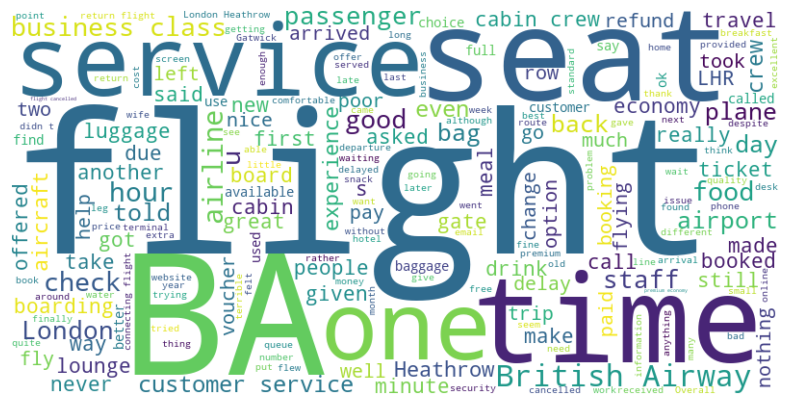

In [83]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the reviews into a single string
all_reviews = ' '.join(df['reviews'])

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [85]:
import gensim
from gensim import corpora

# Tokenize the reviews
tokenized_reviews = [review.split() for review in df['reviews']]

# Create a dictionary from the tokenized reviews
dictionary = corpora.Dictionary(tokenized_reviews)

# Create a document-term matrix
doc_term_matrix = [dictionary.doc2bow(review) for review in tokenized_reviews]

# Build the LDA model
lda_model = gensim.models.LdaModel(
    corpus=doc_term_matrix,
    id2word=dictionary,
    num_topics=5,  # Specify the number of topics
    random_state=42
)

# Print the topics and their corresponding keywords
for topic in lda_model.print_topics():
    print(topic)


(0, '0.012*"flight" + 0.012*"BA" + 0.006*"crew" + 0.005*"service" + 0.005*"British" + 0.005*"get" + 0.004*"would" + 0.004*"business" + 0.004*"good" + 0.004*"one"')
(1, '0.021*"flight" + 0.012*"BA" + 0.006*"one" + 0.005*"service" + 0.005*"staff" + 0.005*"us" + 0.005*"get" + 0.004*"hours" + 0.004*"London" + 0.004*"British"')
(2, '0.012*"flight" + 0.009*"BA" + 0.006*"time" + 0.005*"seat" + 0.005*"cabin" + 0.005*"service" + 0.005*"London" + 0.005*"-" + 0.005*"business" + 0.005*"crew"')
(3, '0.017*"flight" + 0.014*"BA" + 0.006*"British" + 0.006*"service" + 0.004*"Airways" + 0.004*"London" + 0.004*"-" + 0.004*"get" + 0.004*"would" + 0.003*"flights"')
(4, '0.009*"flight" + 0.007*"BA" + 0.005*"service" + 0.004*"crew" + 0.004*"seats" + 0.004*"-" + 0.003*"food" + 0.003*"would" + 0.003*"hours" + 0.003*"us"')


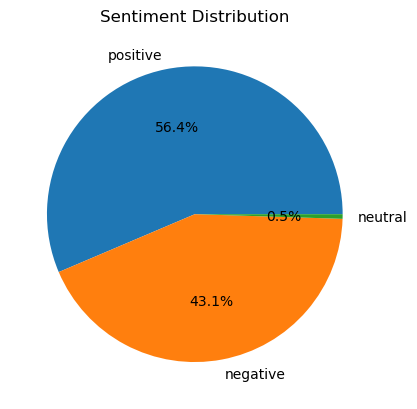

In [103]:
count_sentiment.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()


d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


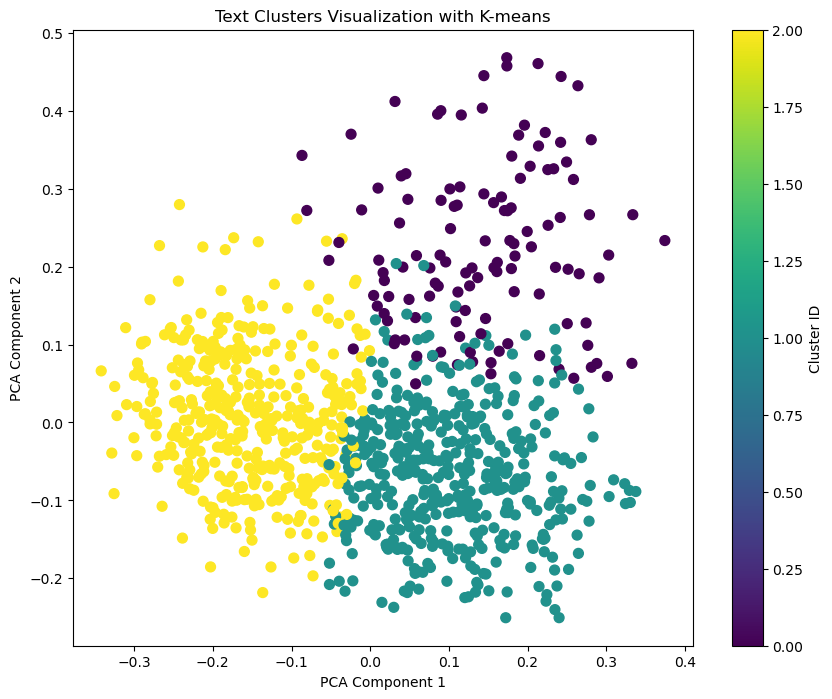

                                               reviews  cluster
0       Paid for a 14 hour long flight ticket which...        2
1       Very inconsiderate PA announcements were ma...        1
2       Absolutely terrible, lost my luggage on bot...        2
3       We booked premium economy round trip from P...        2
4       We chose Rotterdam and London City airport ...        2
..                                                 ...      ...
995     Bucharest to London. My flight with British...        2
996     London Heathrow to Bengaluru. I found the c...        1
997     Madrid to London. We paid for business clas...        0
998     Dublin to London Heathrow. British Airways ...        1
999     London to Seattle. My seat was on the upper...        1

[1000 rows x 2 columns]


In [94]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Text to TF-IDF Vectorization
# Transform the reviews into TF-IDF vectors
tfidf = TfidfVectorizer(stop_words='english', max_features=500)
tfidf_matrix = tfidf.fit_transform(df['reviews'])

# Step 2: K-means Clustering
# Choose the number of clusters
num_clusters = 3  # Adjust the number of clusters based on your dataset
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Add the cluster assignments to the DataFrame
df['cluster'] = kmeans.labels_

# Step 3: Visualize the Clusters (optional)
# To visualize the clusters, you can use PCA to reduce dimensionality
pca = PCA(n_components=2)  # Reduce to 2D for visualization
tfidf_pca = pca.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(10, 8))
plt.scatter(tfidf_pca[:, 0], tfidf_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Text Clusters Visualization with K-means')
plt.colorbar(label='Cluster ID')
plt.show()

print(df)


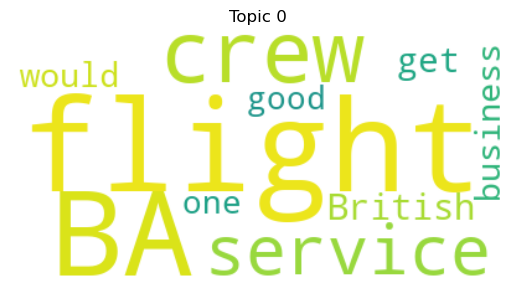

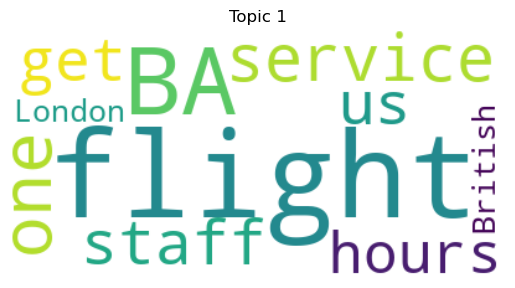

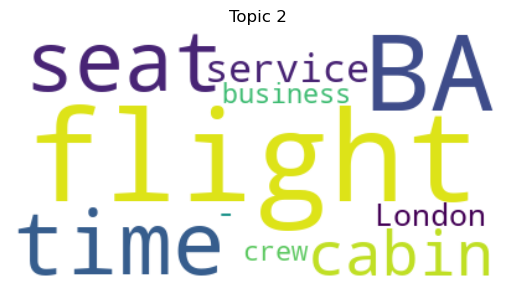

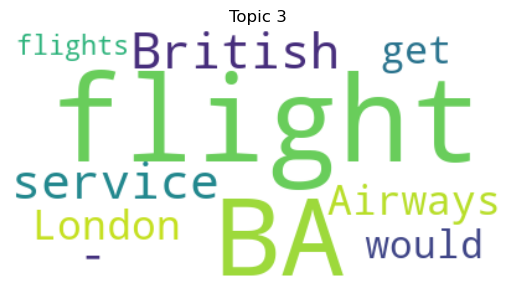

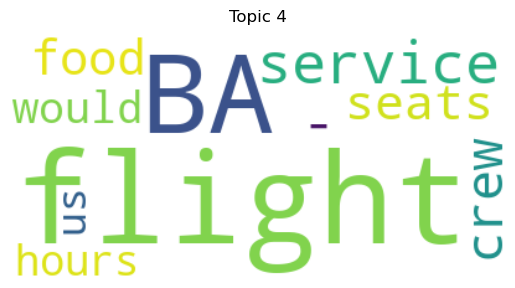

In [99]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# For each topic, we create a WordCloud object
for index, topic in lda_model.show_topics(formatted=False, num_words= 10):
    wc = WordCloud(background_color="white", max_words=10)
    wc.generate_from_frequencies(dict(topic))

    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Topic {index}')
    plt.show()


In [100]:
import pyLDAvis.gensim_models

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.002373  0.010923       1        1  30.693416
1     -0.018502 -0.009296       2        1  27.972804
2      0.003957  0.019570       3        1  19.121575
3     -0.011313 -0.009480       4        1  16.494756
4      0.028231 -0.011717       5        1   5.717449, topic_info=          Term         Freq        Total Category  logprob  loglift
36      flight  1227.000000  1227.000000  Default  30.0000  30.0000
99          BA   908.000000   908.000000  Default  29.0000  29.0000
443    service   428.000000   428.000000  Default  28.0000  28.0000
773      seats   229.000000   229.000000  Default  27.0000  27.0000
133      cabin   239.000000   239.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
461       time    11.510033   309.588054   Topic5  -5.9922  -0.4304
1006  boarding     8.658040   154.185626   Topic5  -6.2769  -0.0180
28       could     9.782921   226.782119   Topic5  -6.1548  -0.2817
59         one    10.598896   332.653447   Topic5  -6.0747  -0.5847
382    flight.     9.399204   247.950990   Topic5  -6.1948  -0.4110

[465 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
9676       1  0.397166            "
9676       3  0.397166            "
7806       3  0.432005  (breakfast)
12704      1  0.543907     (french,
3958       1  0.543924         (low
...      ...       ...          ...
597        3  0.186356        would
597        4  0.154770        would
597        5  0.047379        would
10997      1  0.544019  “E-voucher”
7941       2  0.730405         €500

[864 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5])